In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [29]:
df=pd.read_csv('../Data Set/diabetes.csv')

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


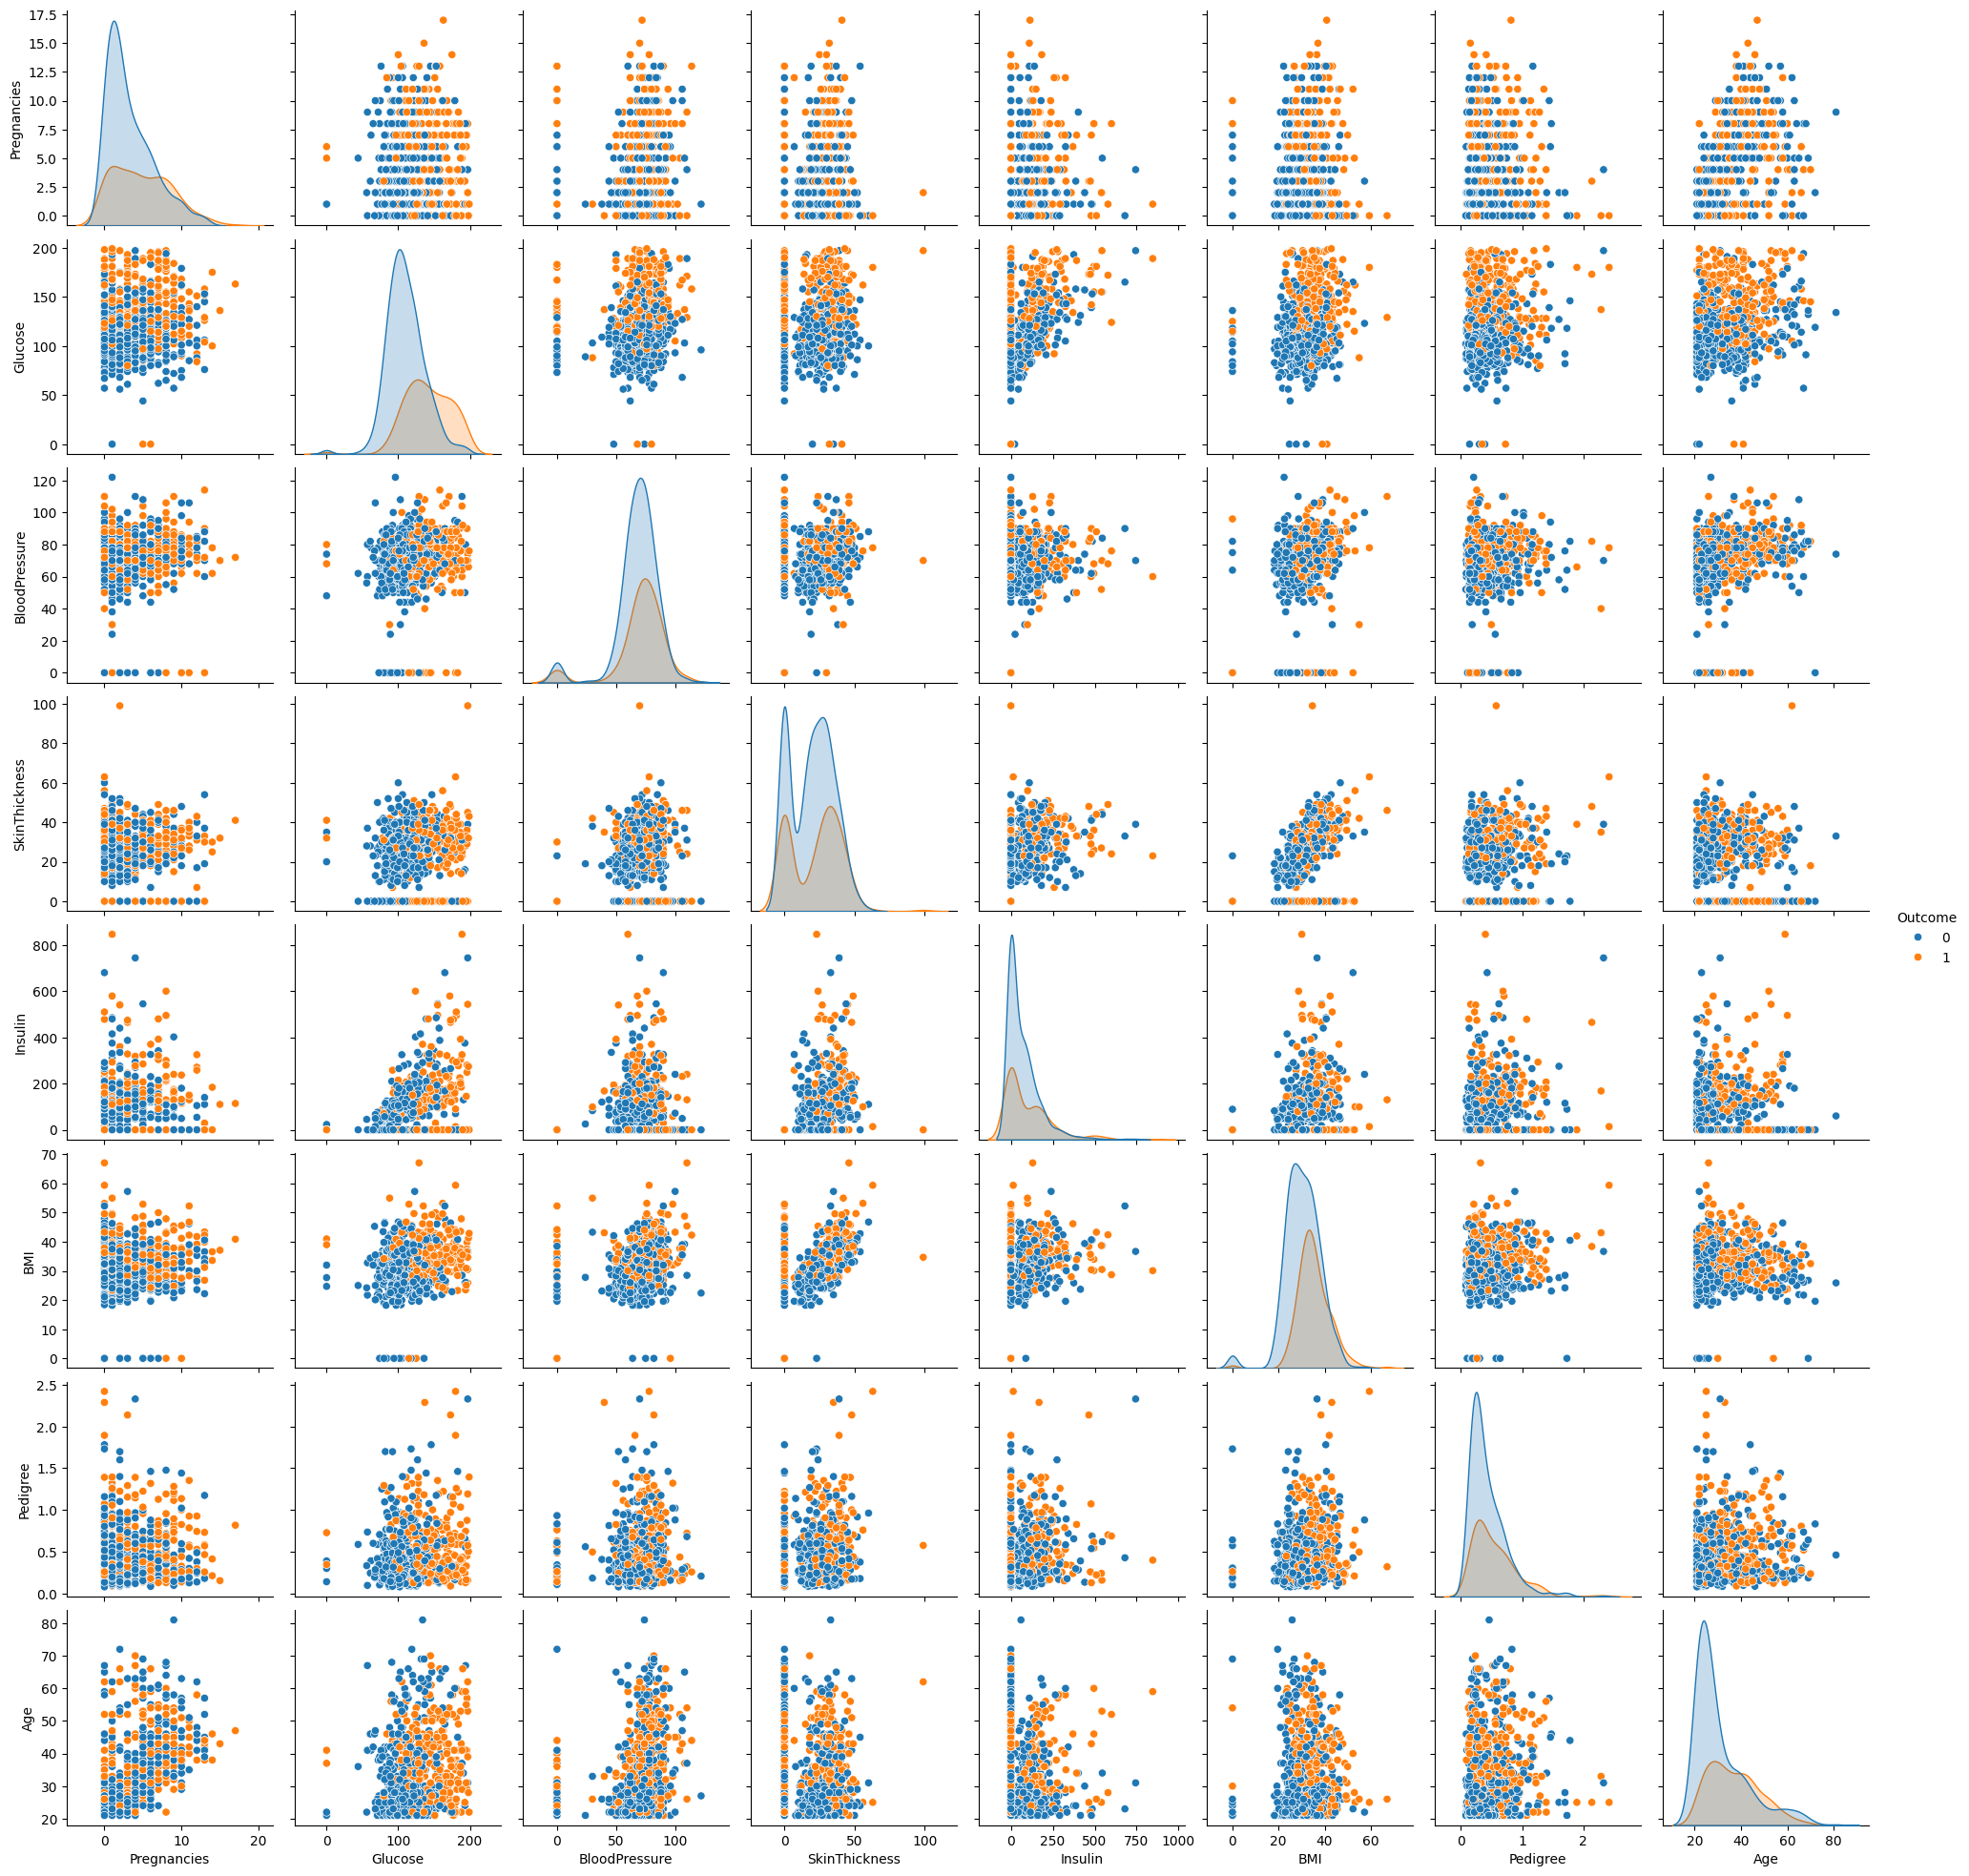

In [31]:
sns.pairplot(df,hue='Outcome')

In [32]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [34]:
scaler=StandardScaler()

In [35]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
clf1=KNeighborsClassifier()
clf2=RandomForestClassifier()
clf3=GradientBoostingClassifier()

In [37]:
estimators=[('Knn',clf1),('rf',clf2),('svc',clf3)]

In [38]:
for estimator in estimators:
    X=cross_val_score(estimator[1],x_train,y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(X),2))

Knn 0.75
rf 0.77
svc 0.78


### Hard voting

In [39]:
vc=VotingClassifier(estimators=estimators,voting='hard')
X=cross_val_score(vc,x_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(X),2))

0.77


### soft voting

In [40]:
vc=VotingClassifier(estimators=estimators,voting='soft')
X=cross_val_score(vc,x_train,y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(X),2))

0.77


In [41]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            X=cross_val_score(vc,x_train,y_train,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(X),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.77
for i=1,j=1,k=3 0.78
for i=1,j=2,k=1 0.77
for i=1,j=2,k=2 0.78
for i=1,j=2,k=3 0.78
for i=1,j=3,k=1 0.77
for i=1,j=3,k=2 0.77
for i=1,j=3,k=3 0.78
for i=2,j=1,k=1 0.76
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.77
for i=2,j=3,k=1 0.77
for i=2,j=3,k=2 0.78
for i=2,j=3,k=3 0.77
for i=3,j=1,k=1 0.76
for i=3,j=1,k=2 0.77
for i=3,j=1,k=3 0.76
for i=3,j=2,k=1 0.76
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.78
for i=3,j=3,k=3 0.77


### Grid Search view

In [ ]:
voting=['hard','soft']
weights=[(1,2,3),(1,1,1),(2,1,1),(1,2,1)]

In [46]:
param_grid={'voting':voting,
            'weights':weights}

In [52]:
vc_grid=GridSearchCV(estimator=vc,param_grid=param_grid,cv=5,n_jobs=-1)

In [53]:
vc_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('Knn',
                                                     KNeighborsClassifier()),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('svc',
                                                     GradientBoostingClassifier())],
                                        voting='soft', weights=[3, 3, 3]),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [[1, 2, 3], [1, 1, 1], [2, 1, 1], [1, 2, 1],
                                     [1, 1, 2]]})

In [54]:
vc_grid.best_params_

{'voting': 'soft', 'weights': [1, 1, 1]}

In [55]:
vc_grid.best_score_

np.float64(0.7801945888311342)